In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Find a Taylor series around $x_{0}=0$ of $\sin^{3}(x)$.  


Let,
$$
y(x) = \sin^{3}(x),
$$

We know the following to be true: 

$$
\sin^{2}(x) = \frac{1 - \cos(2x)}{2},
$$ 

$$
\frac{\sin(x)\cos(2x)}{2} = \frac{1}{4}\left(\sin(3x) - \sin(x)\right)
$$

Then, 

$$
\sin^{3}(x) = \sin^{2}(x)\sin(x) = \frac{1-\cos(2x)}{2}*\sin(x)
$$

$$
= \frac{\sin(x)-\sin(x)\cos(2x)}{2} = \frac{\sin(x)}{2} - \frac{1}{4}(\sin(3x)-\sin(x))
$$

$$
= \frac{\sin(x)}{2}- \frac{\sin(3x)}{4} + \frac{\sin(x)}{4} = \frac{1}{4}(3\sin(x)-\sin(3x))
$$

$$
= \frac{1}{4}[3\sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j + 1)!}x^{2j +1} - \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j + 1)!}x^{2j +1}3^{2j+1}]
$$

$$
= \frac{1}{4}[\sum_{j=0}^{\infty}\frac{3(-1)^{j}x^{2j +1} - (-1)^{j}x^{2j +1}3^{2j+1}}{(2j+1)!}]
$$

Thus, for the Taylor series of $\sin^{3}(x)$ ,
$$
\sin^{3}(x) = \frac{3}{4}\sum_{j=0}^{\infty}\frac{(-1)^{j}x^{2j +1}(1-9^{j})}{(2j+1)!} = x^{3} - \frac{x^{5}}{2} + \frac{13x^{7}}{120} - \frac{41x^{9}}{3024} +  ...
$$

Let $$a_j = \frac{(-1)^{j}(1-9^{j})}{(2j + 1)!}x^{2j +1}$$ then when $j = 0, a_{j}(x) = 0 $ and we can write that:

$$
a_{j}(x) = \left\{
\begin{array}{rl}
\frac{-x^{2}(1-9^{j})}{(2j + 1)(2j)(1-9^{j-1})}a_{j-1} & j\geq 2\\
x^3 & j=1
\end{array}
\right.
$$

In [2]:
#below is a tolerance based, recursive, vectorized implementation of this function
from copy import copy

def sincub_vec(x,tol):
    tot = (4./3.)*(x**3.)
    aj = copy(tot)
    j=2
    x2 = -x**2
    while np.max(np.abs(aj))>= tol:
        aj *= (x2*(1.-(9.**j)))/((2.*j+1.)*(2.*j)*(1.-9.**(j-1.)))
        tot +=aj
        j +=1
    return tot*(3./4.)

Text(0,0.5,'$sin^3(x)$')

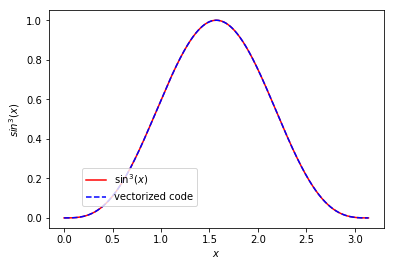

In [3]:
#Plot of the function, vectorized code, and log plots of the error in my approximation for tolerance values  10^−2 ,  10^−4 , and 10^-8 over the interval [0,𝜋] 
xvals = np.linspace(0,np.pi,int(1e3))
yvals = [np.sin(ii)**3. for ii in xvals]

yvals_vec = sincub_vec(xvals,1e-4)

plt.plot(xvals,yvals, color='r',ls='-', label="$\sin^3(x)$")
plt.plot(xvals, yvals_vec, color='b',ls='--', label="vectorized code")

plt.legend(loc=(.1,.1))

plt.xlabel('$x$')
plt.ylabel('$sin^3(x)$')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0,0.5,'$\\log_{10}|Error|$')

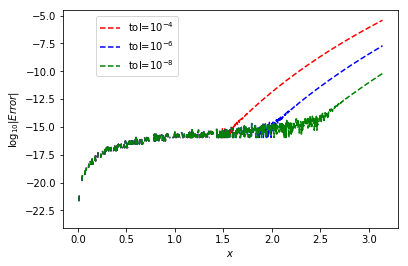

In [4]:
yvals_vec1 = sincub_vec(xvals,1e-4)
yvals_vec2 = sincub_vec(xvals,1e-6)
yvals_vec3 = sincub_vec(xvals,1e-8)

plt.plot(xvals,np.log10(np.abs(yvals-yvals_vec1)),color='r',ls='--',label='tol=$10^{-4}$')
plt.plot(xvals,np.log10(np.abs(yvals-yvals_vec2)),color='b',ls='--',label='tol=$10^{-6}$')
plt.plot(xvals,np.log10(np.abs(yvals-yvals_vec3)),color='g',ls='--',label='tol=$10^{-8}$')

plt.legend(loc=(.1,.7))

plt.xlabel('$x$')
plt.ylabel('$\log_{10}|Error|$')

# Conclusion:
From this graph of the log errors, we can see that at some point for all tolerance values the Taylor series approximation to $sin^{3}(x)$ gets worse as our x value increases.  We can also see that between these three tolerances, the approximation is improving as the tolerance value decreases.

---
# Make a conclusion about this function

$$
a_{n+1} = \left\{
\begin{array}{rl}
\frac{1}{2} a_{n} & \text{if} ~ a_{n} ~ \text{is an even number} \\
3a_{n} + 1 & \text{if} ~ a_{n} ~ \text{is an odd number}
\end{array}
\right.
$$


In [5]:
# print out first 40 numbers where a1 = 11 
xvals = np.zeros(40)
xvals[0] = 11
a1 = 11
an = a1
for j in xrange(1,40):
    if an%2 == 0:
        xvals[j] = (1./2)*an
        an = xvals[j]
    else:
        xvals[j] = 3*an + 1
        an = xvals[j]
print xvals    

[11. 34. 17. 52. 26. 13. 40. 20. 10.  5. 16.  8.  4.  2.  1.  4.  2.  1.
  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.
  4.  2.  1.  4.]


In [6]:
# Do the same for  𝑎1=25 . Make a conjecture about this type of sequence.
xvals = np.zeros(40)
xvals[0] = 25
a1 = 25
an = a1
for j in xrange(1,40):
    if an%2 == 0:
        xvals[j] = (1./2)*an
        an = xvals[j]
    else:
        xvals[j] = 3.*an + 1
        an = xvals[j]
print xvals  

[25. 76. 38. 19. 58. 29. 88. 44. 22. 11. 34. 17. 52. 26. 13. 40. 20. 10.
  5. 16.  8.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.
  4.  2.  1.  4.]


# Conclusion

We can see from the two sequences that eventually the sequence will hit 4 and will repeat through 4 , 2 , and 1 forever. This sequence would go on forever and neither $\frac{1}{2} a_{n}$ nor $3a_{n} + 1 $ could ever reach zero unless the sequence started at zero. However, if it started at 0, it would be a sequence of only 0s. 

---
# Creating and observing sequence trends

We can generate a 3n+1 sequence as follows

- Start with a positive integer n.

- If n = 1, stop.

- If n is even, replace it with n/2.

- If n is odd, replace it with 3n+1.

So if we started with $n=3$, then we would generate the sequence

$$
3, 10, 5, 16, 8, 4, 2, 1
$$

it is unknown whether there are any starting values $n$ which generate a sequence which goes on for forever.  Thus, an interesting associated quantity we would want to know is how many terms a given value of $n$ generates via the $3n+1$ sequence.  We call this number $L(n)$.  For example then, using our example of $n=3$ above, we have that 

$$
L(3)  = 8
$$




In [7]:
# creating a code for L(n) and testing for L(3)
def seq(n):
    j = n
    mylist = []
    mylist.append(n)
    if mylist[len(mylist)-1] == 1: 
        return mylist
    else:
        while mylist[len(mylist)-1] != 1:
            if j%2 == 0:
                j = (1/2.)*j
                mylist.append(j)
            else: 
                j = 3.*j + 1
                mylist.append(j)
        return mylist
def L(n):
    return len(seq(n))
print seq(3)
print L(3)

[3, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0]
8


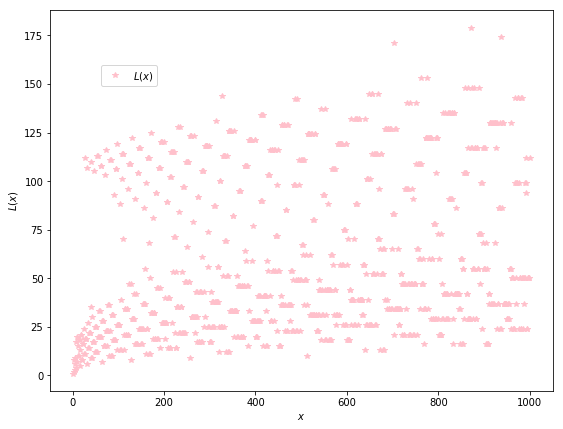

In [8]:
# plot of  𝐿(𝑛)  for  1≤𝑛≤1000 
xvals = np.linspace(1,1000,1000)
yvals = [L(ii) for ii in xvals]

plt.plot(xvals,yvals, color='pink', ls = '', marker='*', label="$L(x)$")

plt.legend(loc=(.1,.8))
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
fig=plt.gcf() 
fig.set_size_inches(9,7)

# Conclusion
Looking at the graph with 1000 points, it is hard to see any trends. However, looking at smaller sections of the graph is more telling. L(x) does not go simply up and down as x increases. At some points it goes up twice such as L(4) to L(5) to L(6) those are all increasing. However, sometimes it increases and decreases as each x increases by 1 such as when x = 24 to x = 28. There are also some points where L(x) stays the same as x increases such as x = 14 to x = 15 and x = 22 to x = 23. Other things I notice is that each x has a finite value, none go to infinity. Also, the highest point in this domain of x is roughly 180. 